In [1]:
#!pip install numpy -q
#!pip install pandas -q
#!pip install matplotlib -q
#!pip install tensorflow -q

#!pip install opendatasets -q

In [4]:
# import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

#import opendatasets as od

### Load Dataset

In [3]:
# download dataset
#od.download("https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification")

In [4]:
BATCH_SIZE = 32
IMAGE_SIZE = (128,128)

In [5]:
train_data_dir = "D:/Projects/FYP-DeepFakeDetection/Dataset/Train"
test_data_dir = "D:/Projects/FYP-DeepFakeDetection/Dataset/Test"

train_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset='training',
                                                         validation_split=0.1,
                                                         seed=42)

validation_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset='validation',
                                                         validation_split=0.1,
                                                         seed=42)

test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE)

Found 140002 files belonging to 2 classes.
Using 126002 files for training.
Found 140002 files belonging to 2 classes.
Using 14000 files for validation.
Found 10905 files belonging to 2 classes.


In [6]:
class_names = train_data.class_names
class_names

['Fake', 'Real']

In [7]:
for image_batch,label_batch in train_data.take(1):
    print(image_batch.shape)
    print(label_batch.shape)

(32, 128, 128, 3)
(32,)


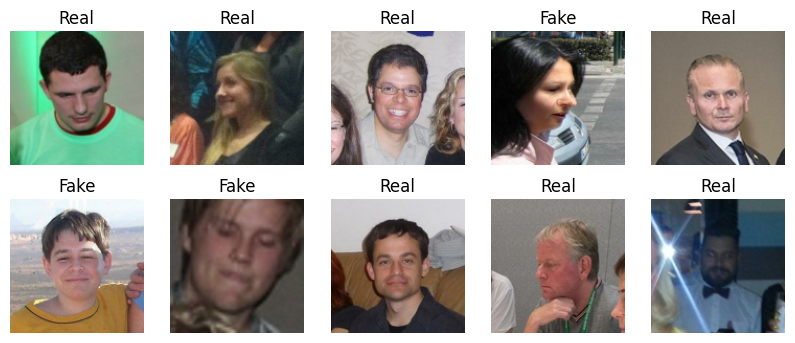

In [8]:
# plot data sample
plt.figure(figsize=(10,4))
for image,label in train_data.take(1):
    for i in range(10):
        ax = plt.subplot(2,5,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(class_names[label[i]])
        plt.axis('off')

### Scaling Images

In [9]:
for image,label in train_data.take(1):
    for i in range(1):
      print(image)

tf.Tensor(
[[[[  4.     4.     4.  ]
   [  4.     4.     4.  ]
   [  4.     4.     4.  ]
   ...
   [  3.25   3.25   1.25]
   [  5.75   4.75   2.75]
   [  7.75   6.75   4.75]]

  [[  4.     4.     4.  ]
   [  4.     4.     4.  ]
   [  4.     4.     4.  ]
   ...
   [  4.5    3.5    1.5 ]
   [  8.5    6.75   5.  ]
   [ 13.75   9.75   8.75]]

  [[  4.     4.     4.  ]
   [  4.     4.     4.  ]
   [  4.     4.     4.  ]
   ...
   [ 10.     5.75   2.75]
   [ 15.    10.25   7.25]
   [ 19.5   14.5   11.5 ]]

  ...

  [[ 29.25  22.25  16.25]
   [ 33.75  26.75  20.75]
   [ 37.5   30.5   24.5 ]
   ...
   [251.   181.25 157.25]
   [206.5  118.    99.5 ]
   [190.25  92.    76.75]]

  [[ 28.    21.    15.  ]
   [ 33.5   26.5   20.5 ]
   [ 37.75  30.75  24.75]
   ...
   [255.   183.25 161.25]
   [212.5  114.75  99.25]
   [172.5   60.5   49.75]]

  [[ 27.25  20.25  14.25]
   [ 33.25  26.25  20.25]
   [ 38.    31.    25.  ]
   ...
   [255.   180.   157.5 ]
   [219.25 115.5  100.75]
   [176.5   58.25  4

In [10]:
train_data = train_data.map(lambda x,y:(x/255,y))
validation_data = validation_data.map(lambda x,y:(x/255,y))
test_data = test_data.map(lambda x,y:(x/255,y))

### Data Augmentation

In [11]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",input_shape=(128,128,3)),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
  ]
)

C:\Users\Aditha Ayomal\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Model Building

In [12]:
model = tf.keras.models.Sequential()

model.add(data_augmentation)

model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 14, 14, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,325,825 (12.69 MB)

 Trainable params: 3,325,569 (12.69 MB)

 Non-trainable params: 256 (1.00 KB)

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

### Model Training

In [15]:
start_time = time.time()

history = model.fit(train_data,
                    epochs=20,
                    validation_data=validation_data)

end_time = time.time()

Epoch 1/20
3938/3938 ━━━━━━━━━━━━━━━━━━━━ 1810s 459ms/step - accuracy: 0.6932 - loss: 0.5722 - val_accuracy: 0.7323 - val_loss: 0.5365
Epoch 2/20
3938/3938 ━━━━━━━━━━━━━━━━━━━━ 1822s 463ms/step - accuracy: 0.8313 - loss: 0.3737 - val_accuracy: 0.8779 - val_loss: 0.2795
Epoch 3/20
3938/3938 ━━━━━━━━━━━━━━━━━━━━ 1825s 463ms/step - accuracy: 0.8751 - loss: 0.2886 - val_accuracy: 0.9048 - val_loss: 0.2286
Epoch 4/20
3938/3938 ━━━━━━━━━━━━━━━━━━━━ 1910s 485ms/step - accuracy: 0.8909 - loss: 0.2570 - val_accuracy: 0.8158 - val_loss: 0.4027
Epoch 5/20
3938/3938 ━━━━━━━━━━━━━━━━━━━━ 1897s 482ms/step - accuracy: 0.8995 - loss: 0.2428 - val_accuracy: 0.9173 - val_loss: 0.2056
Epoch 6/20
3938/3938 ━━━━━━━━━━━━━━━━━━━━ 1863s 473ms/step - accuracy: 0.9051 - loss: 0.2277 - val_accuracy: 0.9121 - val_loss: 0.2198
Epoch 7/20
3938/3938 ━━━━━━━━━━━━━━━━━━━━ 1862s 473ms/step - accuracy: 0.9112 - loss: 0.2159 - val_accuracy: 0.9233 - val_loss: 0.1951
Epoch 8/20
3938/3938 ━━━━━━━━━━━━━━━━━━━━ 1866s 474ms/s

In [16]:
print(f'Total time for training {(end_time-start_time):.3f} seconds')

Total time for training 37664.736 seconds


### Performance Analysis

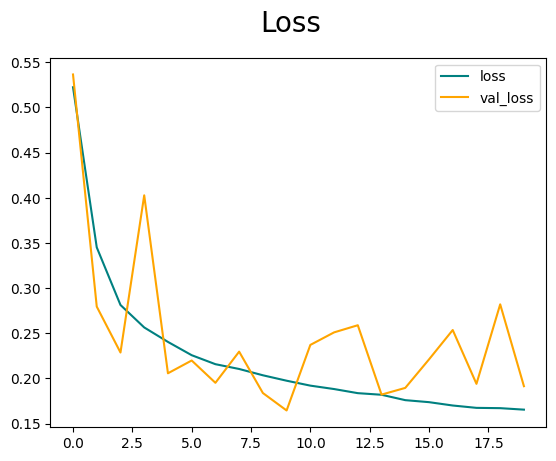

In [17]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend()
plt.show()

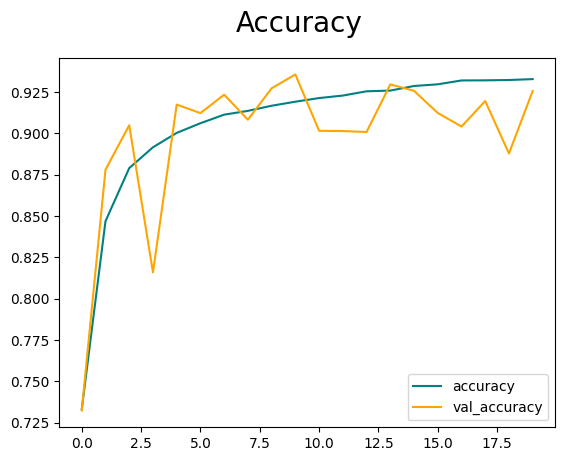

In [18]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend()
plt.show()

### Model Evaluation

In [19]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()

In [20]:
for batch in test_data.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━

In [21]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.91742265>

In [22]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.7286163>

In [23]:
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.83273727>

### Test

In [24]:
#!pip install opencv-python -q

In [5]:
import cv2

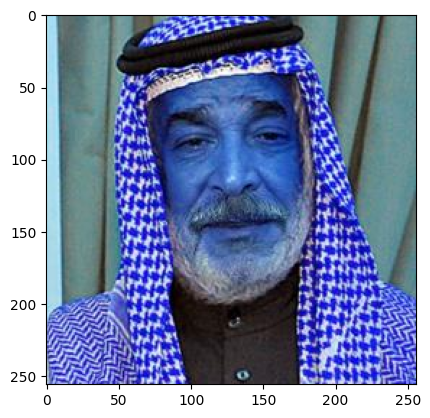

In [6]:
img = cv2.imread('D:/Projects/FYP-DeepFakeDetection/Sample/fake_173.jpg')
plt.imshow(img)
plt.show()

In [7]:
resized_image = tf.image.resize(img, IMAGE_SIZE)
scaled_image = resized_image/255

NameError: name 'IMAGE_SIZE' is not defined

In [ ]:
scaled_image.shape


In [ ]:
np.expand_dims(scaled_image, 0).shape

In [ ]:
yhat = model.predict(np.expand_dims(scaled_image, 0))

In [ ]:
yhat

In [ ]:
class_names

In [ ]:
if yhat > 0.5:
    print(f'{class_names[1]}')
else:
    print(f'{class_names[0]}')

In [ ]:
#model.save('dfd_testcode.keras')